In [6]:
import matplotlib.pyplot as plt
from getConfig import getConfig
from datetime import timedelta
from dateutil import parser

In [7]:
config = getConfig()

In [28]:
df = pd.read_csv(config["dataLoc"]+"predictions.csv")

In [29]:
df.head()

,date,hour,STL,RF,XGB,ensemble,actual,panel
0,2017-11-25,0,116,190.510354,78.26075,128.257034,79.0,HN000383P
1,2017-11-25,1,98,190.510354,78.26075,122.257034,105.0,HN000383P
2,2017-11-25,2,83,190.510354,78.26075,117.257034,109.0,HN000383P
3,2017-11-25,3,68,190.510354,78.26075,112.257034,53.0,HN000383P
4,2017-11-25,4,65,166.911592,75.06667,102.326088,44.5,HN000383P


In [30]:
# Convert their date format to a standard date
df["date"] = pd.to_datetime(df["date"])

In [31]:
# Get a random panel to view
panel = np.random.choice(df["panel"].unique())

df2 = df.loc[df["panel"]==panel]

In [32]:
start = df2["date"].min()

##### Actual vs STL

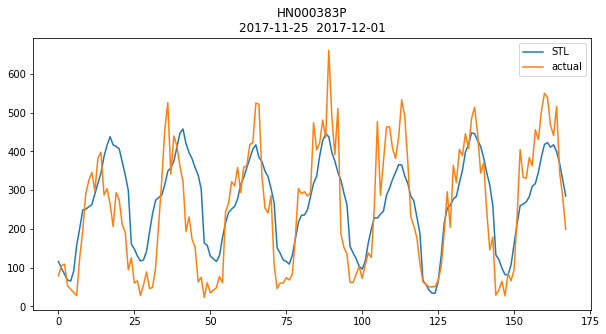

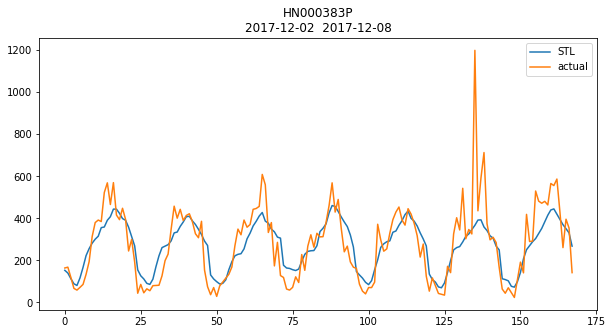

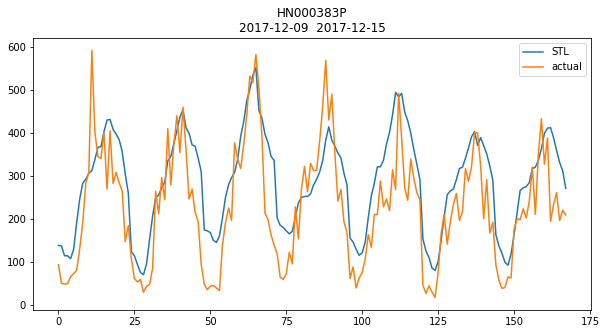

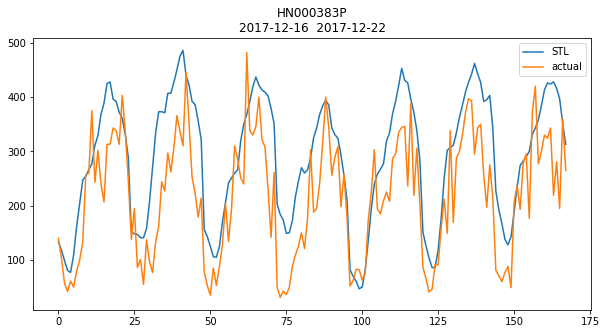

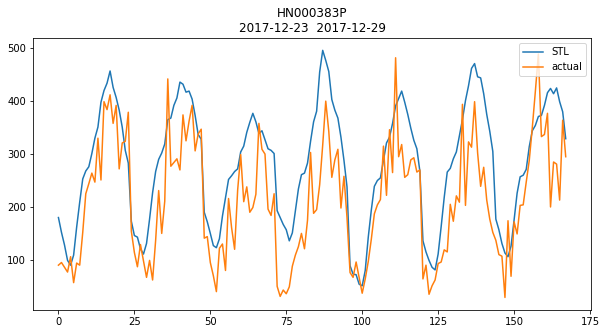

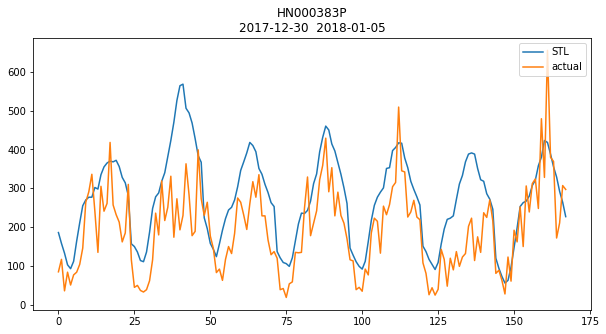

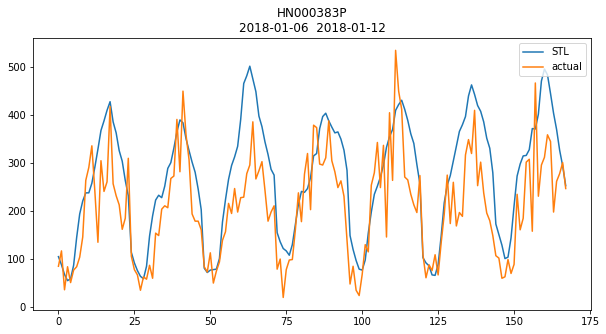

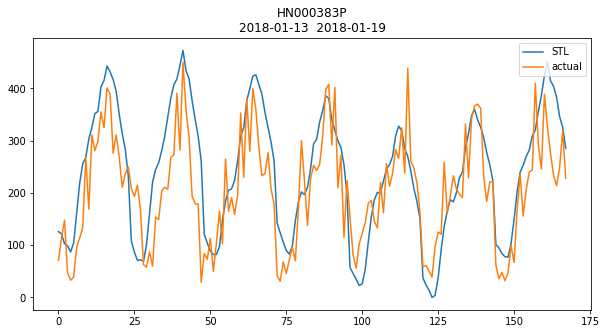

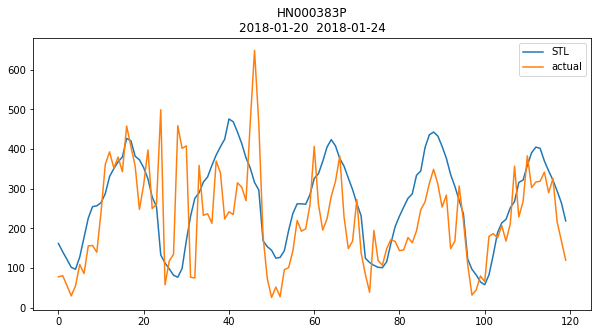

In [33]:
start = df2["date"].min()
while start < df2["date"].max():
    end = start+timedelta(weeks=1)
    tmp = df2.loc[~(df2["date"] < start) & (df2["date"] < end)]
    fromdt = tmp["date"].min().date()
    todt   = tmp["date"].max().date()
    X = [x for x in range(tmp.shape[0])]
    plt.figure(figsize=(10,5))
    plt.plot(X, tmp["STL"])
    plt.plot(X, tmp["actual"])
    plt.legend(loc=1)
    t = panel+"\n"+str(fromdt)+"  "+str(todt)
    plt.title(t)
    plt.show()
    start = end

##### XGB vs RF and actual

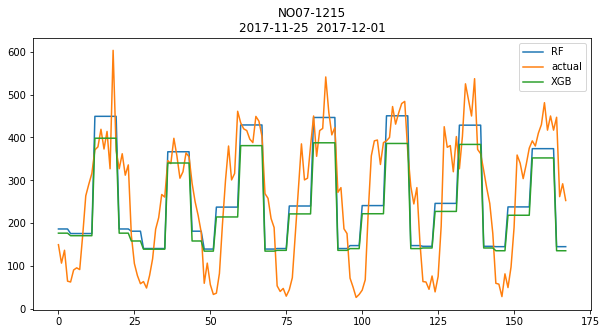

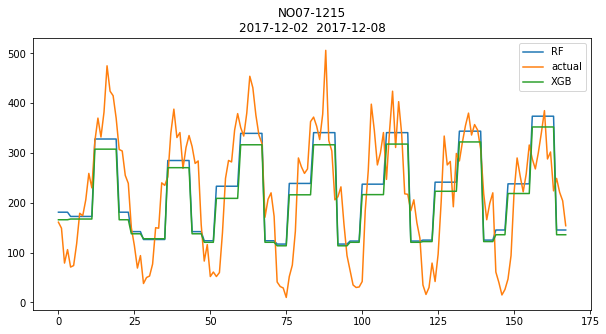

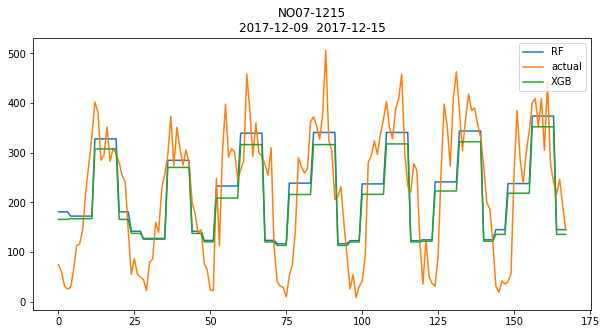

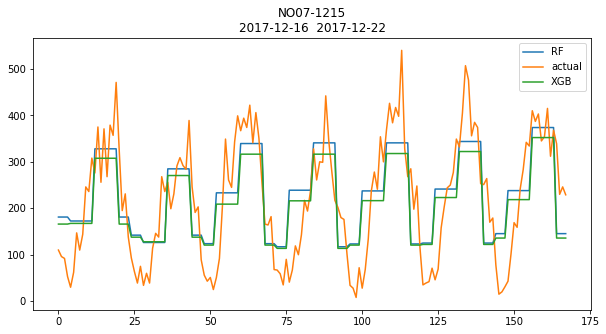

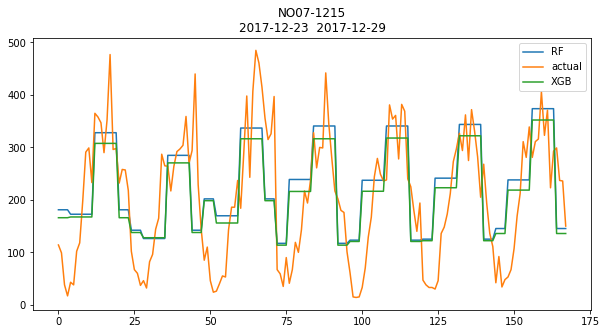

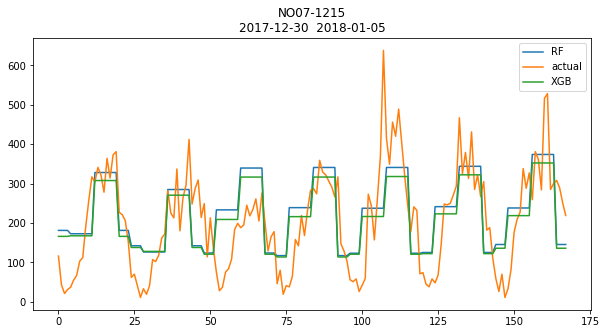

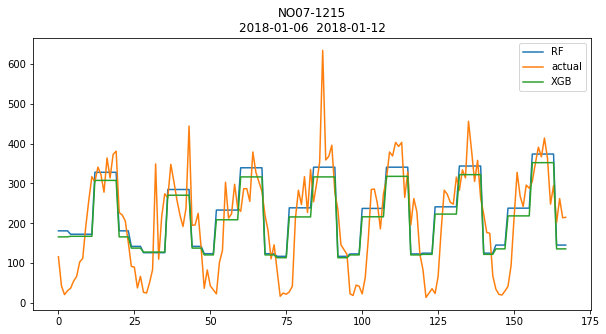

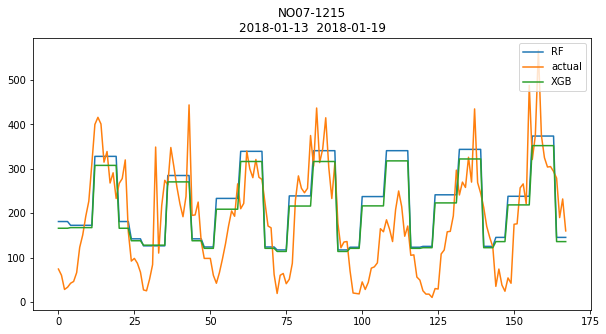

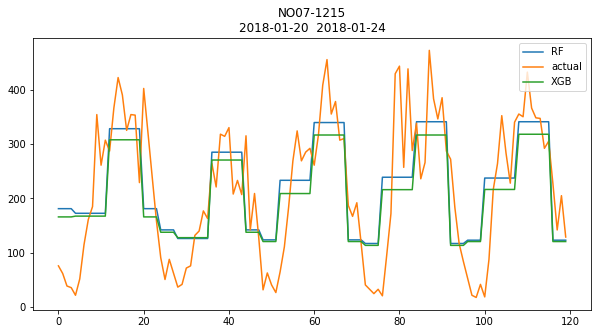

In [26]:
start = df2["date"].min()
while start < df2["date"].max():
    end = start+timedelta(weeks=1)
    tmp = df2.loc[~(df2["date"] < start) & (df2["date"] < end)]
    fromdt = tmp["date"].min().date()
    todt   = tmp["date"].max().date()
    X = [x for x in range(tmp.shape[0])]
    plt.figure(figsize=(10,5))
    plt.plot(X, tmp["RF"])
    plt.plot(X, tmp["actual"])
    plt.plot(X, tmp["XGB"])
    plt.legend(loc=1)
    t = panel+"\n"+str(fromdt)+"  "+str(todt)
    plt.title(t)
    plt.show()
    start = end

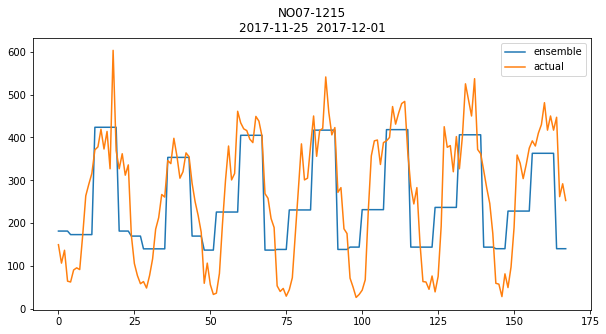

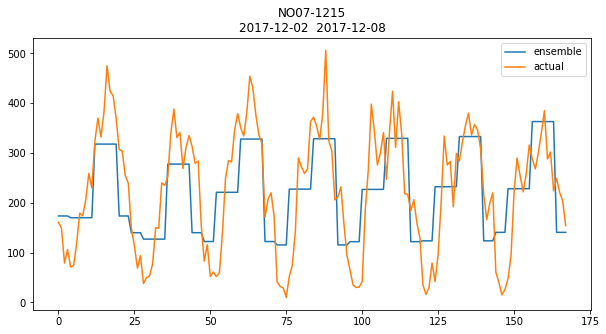

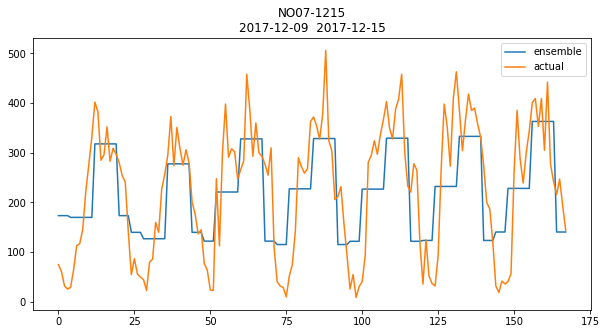

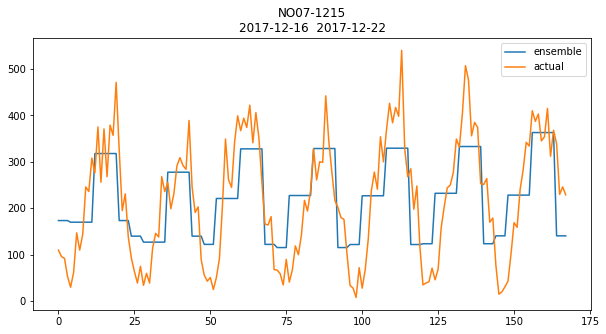

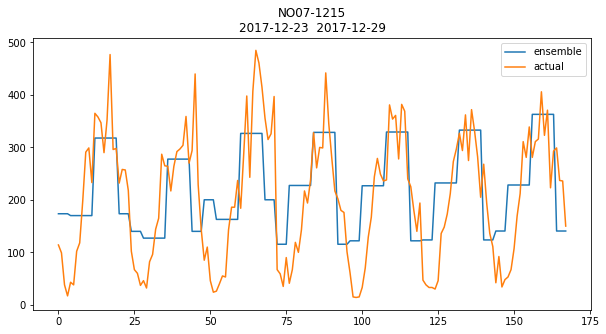

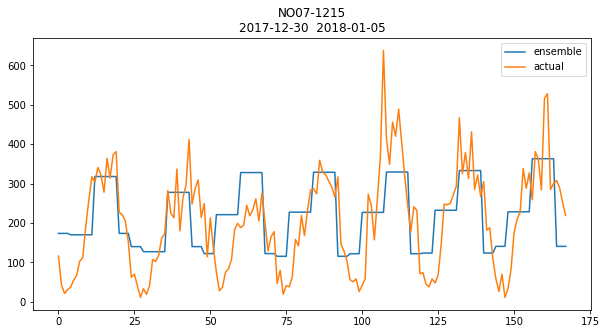

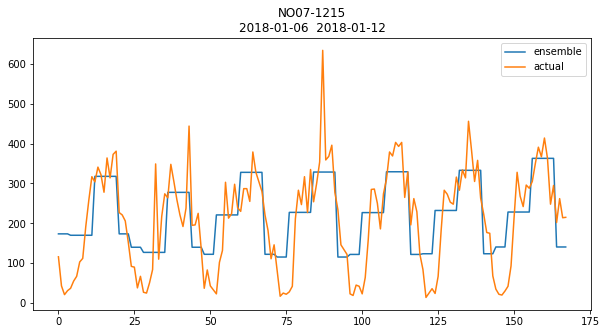

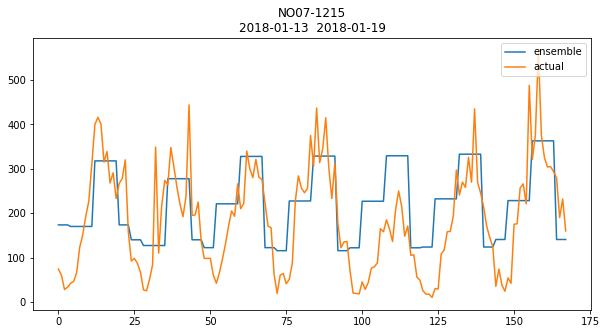

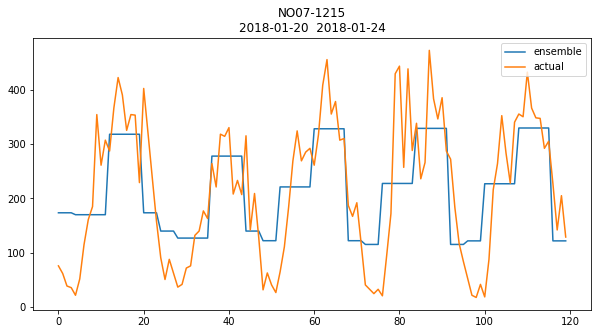

In [27]:
start = df2["date"].min()
while start < df2["date"].max():
    end = start+timedelta(weeks=1)
    tmp = df2.loc[~(df2["date"] < start) & (df2["date"] < end)]
    fromdt = tmp["date"].min().date()
    todt   = tmp["date"].max().date()
    X = [x for x in range(tmp.shape[0])]
    plt.figure(figsize=(10,5))
    plt.plot(X, tmp["ensemble"])
    plt.plot(X, tmp["actual"])
    plt.legend(loc=1)
    t = panel+"\n"+str(fromdt)+"  "+str(todt)
    plt.title(t)
    plt.show()
    start = end